<a href="https://colab.research.google.com/github/AnshSharma16/Machine-learning-regression-with-Python/blob/main/YearsExperiencevsSalaryUsingGradientSLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Salary_dataset.csv")

# Check for missing values
print(round((df.isnull().sum() / df.shape[0]) * 100, 2))
print(df)


Saving Salary_dataset.csv to Salary_dataset (3).csv
YearsExperience    0.0
Salary             0.0
dtype: float64
    YearsExperience  Salary
0               1.2   39344
1               1.4   46206
2               1.6   37732
3               2.1   43526
4               2.3   39892
5               3.0   56643
6               3.1   60151
7               3.3   54446
8               3.3   64446
9               3.8   57190
10              4.0   63219
11              4.1   55795
12              4.1   56958
13              4.2   57082
14              4.6   61112
15              5.0   67939
16              5.2   66030
17              5.4   83089
18              6.0   81364
19              6.1   93941
20              6.9   91739
21              7.2   98274
22              8.0  101303
23              8.3  113813
24              8.8  109432
25              9.1  105583
26              9.6  116970
27              9.7  112636
28             10.4  122392
29             10.6  121873


In [61]:
class GradientDescent:
    def __init__(self, learning_rate=0.01, iterations=100000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.m = None
        self.b = None

    def fit(self, X, y):
        self.b = 0
        self.m = 0
        n = X.shape[0]

        for _ in range(self.iterations):
            b_grad = -2 * np.sum(y - (self.m * X + self.b)) / n
            m_grad = -2 * np.sum(X * (y - (self.m * X + self.b))) / n
            self.b = self.b - self.learning_rate * b_grad
            self.m = self.m - self.learning_rate * m_grad
        self.m, self.b = self.m, self.b

    def predict(self, X):
        return self.m * X + self.b

In [65]:
from sklearn.model_selection import train_test_split

# Prepare the data
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the model
model = GradientDescent(learning_rate=0.01, iterations=100000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 37867393.38893891
Root Mean Squared Error: 6153.648786609365
R-squared: 0.9532338376280699


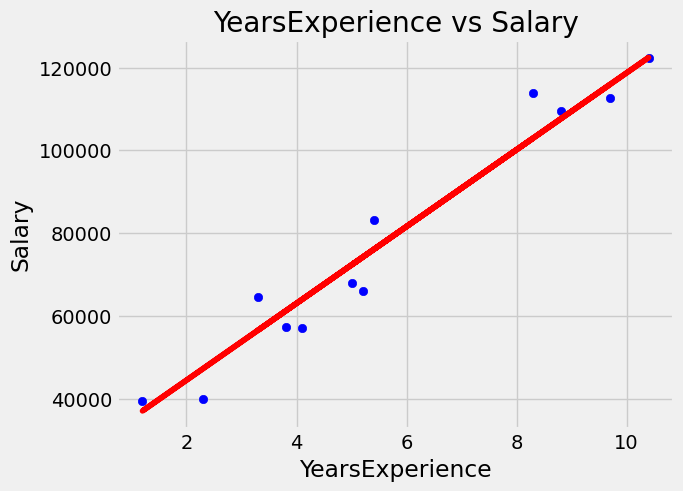

In [64]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_pred,color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary')
plt.show()